In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import wandb
import pandas as pd



In [13]:
# info = {
#         'ql': ('ql-eval-2', "num_=64"),
#         'ql-sf': ('ql-sf-eval-2', "alg=qlearning_sf_aux,num_=64"),
#         'dyna': ('dyna-eval-2', "alg=dyna,num_=64,num_=1"),
#         'preplay': ('preplay-eval-2', "alg=preplay,num_=64,num_=1"),
#     }

# df = wandb_result_plots.get_achievement_data(
#     setting="evaluator_performance-achievements-64",
#     info=info,
# )
# wandb_result_plots.plot_achievement_bars(df)


In [25]:
import wandb_result_plots

ntraining_envs = [8, 16, 32, 64, 128, 256, 512]
settings = [f"evaluator_performance-achievements-{n}" for n in ntraining_envs]
# model_to_group = {
#     'ql': 'ql-eval-5',
#     'ql-sf': 'ql-sf-eval-4',
#     'dyna': 'dyna-eval-5',
#     'preplay': 'preplay-eval-5',
# }
model_to_group = {
    'ql': 'ql-final-3',
    'ql-sf': 'ql-final-3',
    'dyna': 'dyna-final-3',
    'preplay': 'preplay-final-3',
}
df = wandb_result_plots.get_metric_data_by_group(
    model_to_group=model_to_group,
    debug=False,
)
df

Models:   0%|          | 0/1 [00:00<?, ?it/s]

ql-final-2


Processing ql-sf runs:   0%|          | 0/40 [00:00<?, ?it/s]

Saved data/ql-sf_ql-final-2_raw.json


,model,setting,group,name,metric,value,run_id
0,ql-sf,actor_performance-8,ql-final-2,num_=8,0.score,4.096943,s27gasih
1,ql-sf,actor_performance-achievements-8,ql-final-2,num_=8,Achievements/cast_fireball,0.000000,s27gasih
2,ql-sf,actor_performance-achievements-8,ql-final-2,num_=8,Achievements/cast_iceball,0.000000,s27gasih
3,ql-sf,actor_performance-achievements-8,ql-final-2,num_=8,Achievements/collect_coal,34.653465,s27gasih
4,ql-sf,actor_performance-achievements-8,ql-final-2,num_=8,Achievements/collect_diamond,0.000000,s27gasih
...,...,...,...,...,...,...,...
5435,ql-sf,evaluator_performance-achievements-1024,ql-final-2,num_=1024,Achievements/place_plant,98.789352,rxj296vq
5436,ql-sf,evaluator_performance-achievements-1024,ql-final-2,num_=1024,Achievements/place_stone,88.549622,rxj296vq
5437,ql-sf,evaluator_performance-achievements-1024,ql-final-2,num_=1024,Achievements/place_table,98.780487,rxj296vq
5438,ql-sf,evaluator_performance-achievements-1024,ql-final-2,num_=1024,Achievements/place_torch,0.251889,rxj296vq


In [35]:
df[df['metric'] == f'0.score']

,model,setting,group,name,metric,value,run_id
0,ql-sf,actor_performance-8,ql-final-2,num_=8,0.score,4.096943,s27gasih
68,ql-sf,evaluator_performance-8,ql-final-2,num_=8,0.score,2.582555,s27gasih
136,ql-sf,actor_performance-8,ql-final-2,num_=8,0.score,3.959471,0anz96ro
204,ql-sf,evaluator_performance-8,ql-final-2,num_=8,0.score,2.019768,0anz96ro
272,ql-sf,actor_performance-8,ql-final-2,num_=8,0.score,4.147025,hqpi9x56
...,...,...,...,...,...,...,...
5100,ql-sf,evaluator_performance-1024,ql-final-2,num_=1024,0.score,4.030984,20flo3sm
5168,ql-sf,actor_performance-1024,ql-final-2,num_=1024,0.score,3.728334,vx7hoobz
5236,ql-sf,evaluator_performance-1024,ql-final-2,num_=1024,0.score,4.090078,vx7hoobz
5304,ql-sf,actor_performance-1024,ql-final-2,num_=1024,0.score,4.041001,rxj296vq


/Users/wilka/git/research/preplay/wandb_result_plots.py:338: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-s" (-> linestyle='-'). The keyword argument will take precedence.
  ntraining_envs = [8, 16, 32, 64, 128, 256, 512]


<Axes: title={'center': 'Generalization Performance to \n10,000 Unique Environments'}, xlabel='Number of Unique Training Environments', ylabel='% Maximum Score'>

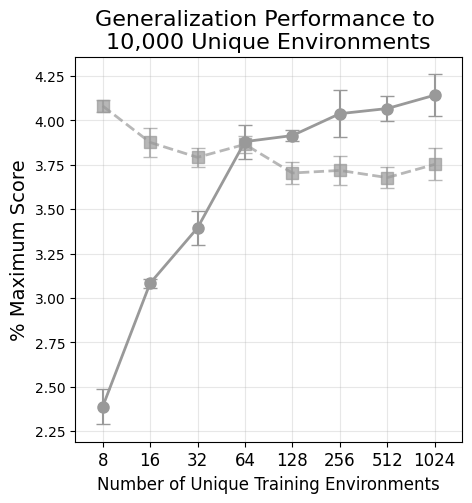

In [36]:
wandb_result_plots.plot_training_envs_score(
    df,
    ntraining_envs=[8, 16, 32, 64, 128, 256, 512, 1024],
)

(<Figure size 1200x500 with 1 Axes>,
 <Axes: title={'center': 'Per-Achievement Generalization Success Rates given 512 Unique Training Environments'}, ylabel='Success Rate'>)

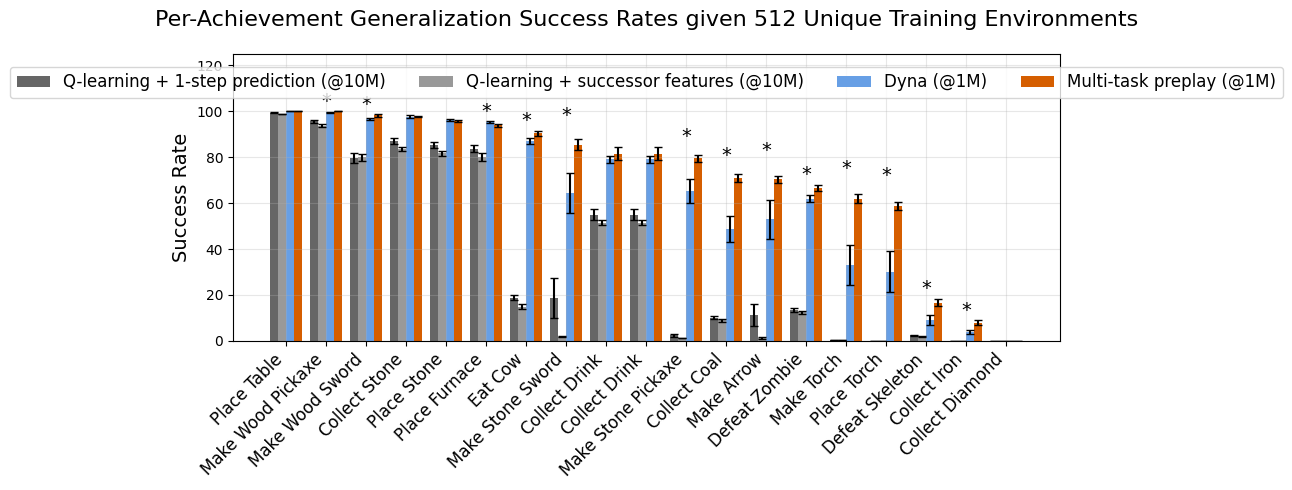

In [20]:
wandb_result_plots_2.plot_achievement_bars(df, n=512, figsize=(12, 5))

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(10, 5))

In [3]:
api = wandb.Api()

In [68]:
runs[-1].group

'dyna-eval-5'

In [66]:
entity='wcarvalho92'
project='craftax'
def get_runs(group, name=None):
    return api.runs(
        f"{entity}/{project}",
        filters={
            'group': group,
            **({"display_name": name} if name else {}),
        })
runs = get_runs(
    group='dyna-eval-5',
    # name="alg=preplay,num_=64,num_=1"
)
runs[-1].history()
runs[-1].summary.keys()

dict_keys(['DynaLossFn/0.grad_norm', 'DynaLossFn/0.param_norm', 'DynaLossFn/0.q_loss/dyna', 'DynaLossFn/0.q_loss/online', 'DynaLossFn/0.q_td/dyna', 'DynaLossFn/0.q_td/online', 'DynaLossFn/1.reward/dyna', 'DynaLossFn/1.reward/online', 'DynaLossFn/num_actor_steps', 'DynaLossFn/num_learner_updates', 'DynaLossFn/z.q_mean/dyna', 'DynaLossFn/z.q_mean/online', 'DynaLossFn/z.q_var/dyna', 'DynaLossFn/z.q_var/online', '_runtime', '_step', '_timestamp', '_wandb', 'evaluator_performance-16/0.episode_length', 'evaluator_performance-16/0.episode_return', 'evaluator_performance-16/0.score', 'evaluator_performance-16/num_actor_steps', 'evaluator_performance-16/num_learner_updates', 'evaluator_performance-achievements-16/Achievements/cast_fireball', 'evaluator_performance-achievements-16/Achievements/cast_iceball', 'evaluator_performance-achievements-16/Achievements/collect_coal', 'evaluator_performance-achievements-16/Achievements/collect_diamond', 'evaluator_performance-achievements-16/Achievements/c

In [64]:
runs[0].history()
runs[0].summary.keys()

dict_keys([])

In [56]:
for run in runs:
    print(f"Run ID: {run.id}")
    print(f"Run Name: {run.name}")
    print(f"Run URL: {run.url}")
    # Access other properties or metrics as needed

Run ID: r3s6jv33
Run Name: alg=dyna,num_=32,num_=4
Run URL: https://wandb.ai/wcarvalho92/craftax/runs/r3s6jv33
Run ID: 8v039muf
Run Name: alg=dyna,num_=32,num_=4
Run URL: https://wandb.ai/wcarvalho92/craftax/runs/8v039muf
Run ID: pb1r13ab
Run Name: alg=dyna,num_=32,num_=4
Run URL: https://wandb.ai/wcarvalho92/craftax/runs/pb1r13ab
Run ID: 7o7cs9fa
Run Name: alg=dyna,num_=32,num_=4
Run URL: https://wandb.ai/wcarvalho92/craftax/runs/7o7cs9fa
Run ID: pkz045bg
Run Name: alg=dyna,num_=32,num_=4
Run URL: https://wandb.ai/wcarvalho92/craftax/runs/pkz045bg
Run ID: i3ogx0jr
Run Name: alg=dyna,num_=32,num_=4
Run URL: https://wandb.ai/wcarvalho92/craftax/runs/i3ogx0jr
Run ID: kqmellc7
Run Name: alg=dyna,num_=32,num_=4
Run URL: https://wandb.ai/wcarvalho92/craftax/runs/kqmellc7
Run ID: dm1uluxd
Run Name: alg=dyna,num_=64,num_=4
Run URL: https://wandb.ai/wcarvalho92/craftax/runs/dm1uluxd
Run ID: x6p7oulr
Run Name: alg=dyna,num_=32,num_=4
Run URL: https://wandb.ai/wcarvalho92/craftax/runs/x6p7oulr
R

In [18]:
all_keys = list(preplay_runs[0].summary.keys())
all_keys

achievement_keys = [k for k in all_keys if 'Achievements' in k]
achievement_keys

['evaluator_performance-achievements-64/Achievements/cast_fireball',
 'evaluator_performance-achievements-64/Achievements/cast_iceball',
 'evaluator_performance-achievements-64/Achievements/collect_coal',
 'evaluator_performance-achievements-64/Achievements/collect_diamond',
 'evaluator_performance-achievements-64/Achievements/collect_drink',
 'evaluator_performance-achievements-64/Achievements/collect_iron',
 'evaluator_performance-achievements-64/Achievements/collect_ruby',
 'evaluator_performance-achievements-64/Achievements/collect_sapling',
 'evaluator_performance-achievements-64/Achievements/collect_sapphire',
 'evaluator_performance-achievements-64/Achievements/collect_stone',
 'evaluator_performance-achievements-64/Achievements/collect_wood',
 'evaluator_performance-achievements-64/Achievements/damage_necromancer',
 'evaluator_performance-achievements-64/Achievements/defeat_archer',
 'evaluator_performance-achievements-64/Achievements/defeat_deep_thing',
 'evaluator_performance

In [23]:
# achievements = [
#     "collect_coal",  # better
#     "collect_wood",  # same
#     "defeat_zombie", # same
#     "collect_stone", # same
    
# ]
crafter_achievements = [
    "Collect Coal",
    "Collect Diamond",
    "Collect Drink",
    "Collect Iron",
    "Collect Sapling",
    "Collect Stone",
    "Collect Wood",
    "Defeat Skeleton",
    "Defeat Zombie",
    "Eat Cow",
    "Eat Plant",
    "Make Iron Pickaxe",
    "Make Iron Sword",
    "Make Stone Pickaxe",
    "Make Stone Sword",
    "Make Wood Pickaxe",
    "Make Wood Sword",
    "Place Furnace",
    "Place Plant",
    "Place Stone",
    "Place Table",
    "Wake Up",
]
crafter_achievements = [k.lower().replace(" ", "_") for k in crafter_achievements]
crafter_achievements

['collect_coal',
 'collect_diamond',
 'collect_drink',
 'collect_iron',
 'collect_sapling',
 'collect_stone',
 'collect_wood',
 'defeat_skeleton',
 'defeat_zombie',
 'eat_cow',
 'eat_plant',
 'make_iron_pickaxe',
 'make_iron_sword',
 'make_stone_pickaxe',
 'make_stone_sword',
 'make_wood_pickaxe',
 'make_wood_sword',
 'place_furnace',
 'place_plant',
 'place_stone',
 'place_table',
 'wake_up']

In [11]:
data = []
for run in preplay_runs:
    history = run.history()
    key = "evaluator_performance-achievements-64/Achievements/learn_iceball"
    if key in history.columns:
        data.append(history[key])

df = pd.DataFrame(data)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
evaluator_performance-achievements-64/Achievements/learn_iceball,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0
evaluator_performance-achievements-64/Achievements/learn_iceball,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0
evaluator_performance-achievements-64/Achievements/learn_iceball,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0


In [13]:
df=df.dropna()

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
